In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
%matplotlib inline
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import linregress 

In [5]:
pd.option_context('display.precision', 10)
pd.set_option('display.float_format', '{:.10f}'.format)

In [6]:
df=pd.read_csv("classified_lcs\grs1915_lc240.txt",sep="	",skiprows=[0, 1], header=None)

In [7]:
n=len(df)

In [8]:
df.columns = ['time', 'total','low','mid','high'] #time in seconds

In [9]:
df

,time,total,low,mid,high
0,99269349.0703124851,441.6000065804,275.2000041008,81.6000012159,528.0000000000
1,99269349.1953124851,524.8000078201,280.0000041723,115.2000017166,288.0000000000
2,99269349.3203124851,800.0000119209,464.0000069141,163.2000024319,320.0000000000
3,99269349.4453124851,601.6000089645,323.2000048161,126.4000018835,368.0000000000
4,99269349.5703124851,582.4000086784,324.8000048399,121.6000018120,672.0000000000
...,...,...,...,...,...
186,99269372.3203124851,619.2000092268,363.2000054121,136.0000020266,320.0000000000
187,99269372.4453124851,508.8000075817,307.2000045776,88.0000013113,480.0000000000
188,99269372.5703124851,828.8000123501,470.4000070095,161.6000024080,560.0000000000
189,99269372.6953124851,491.2000073195,296.0000044107,84.8000012636,400.0000000000


In [15]:
df["total"] - (df["low"] + df["mid"])

0      84.8000012636
1     129.6000019312
2     172.8000025749
3     152.0000022650
4     136.0000020266
           ...      
186   120.0000017881
187   113.6000016928
188   196.8000029325
189   110.4000016451
190   118.4000017643
Length: 191, dtype: float64

In [16]:
#time step is 0.125 sec

In [17]:
low=np.array(list(df["low"]))
mid=np.array(list(df["mid"]))
high=np.array(list(df["high"]))

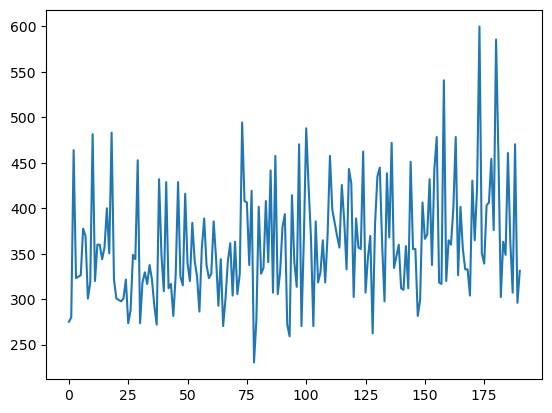

In [18]:
plt.plot(range(len(low)),low)
plt.show()

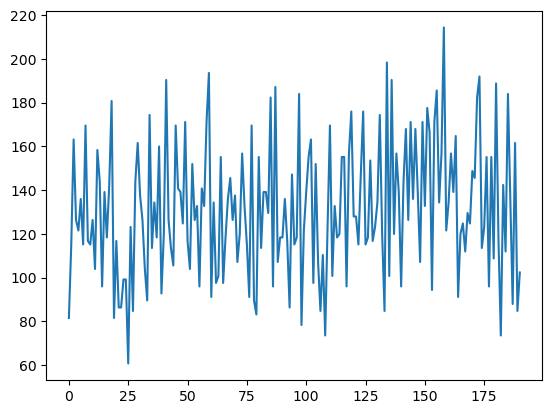

In [19]:
plt.plot(range(len(mid)),mid)
plt.show()

Null Hypothesis: a and b are compatible <br/>
    1) Get the distribution of (a-b)/sqrt(2*N)
         <pre>( since N isnt given,we use the estimator N=(a+b)/2 )</pre>
    2) Expect a normal gaussian,check summary statistic: average and sigma<br/>
    3) do same for all files,get histogram for all Lc_i<br/>
    4) make a simulation and check the expected vs the obsered

In [99]:
np.std(low)

321.0252939802491

In [101]:
np.std(mid)

462.0867262473461

In [96]:
np.mean(low)

1060.3581658487233

In [97]:
np.mean(mid)

1107.5053175232224

In [135]:
x=(low[4000:]-mid[4000:])/np.sqrt(low[4000:]+mid[4000:])

In [136]:
np.std(x)

3.728746526986048

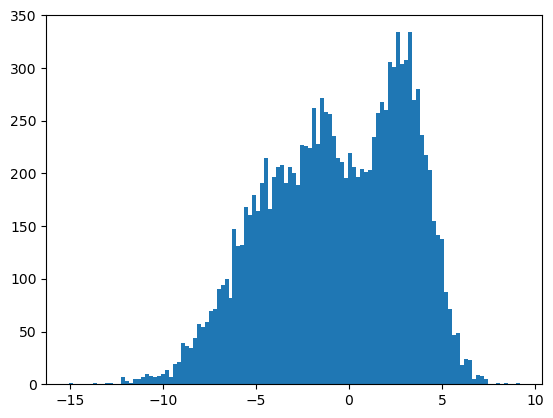

In [137]:
plt.hist(x,int(np.sqrt(len(x))))
plt.show()

In [117]:
total=0
for i in range(n):
    if(x[i]>0):
        total+=1
print(total)
print(total/n)

8316
0.49035910136210864


8350


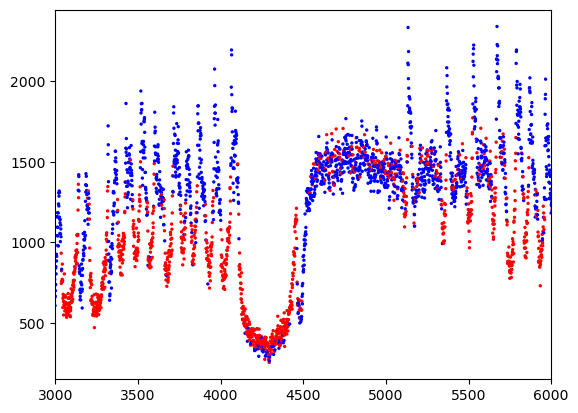

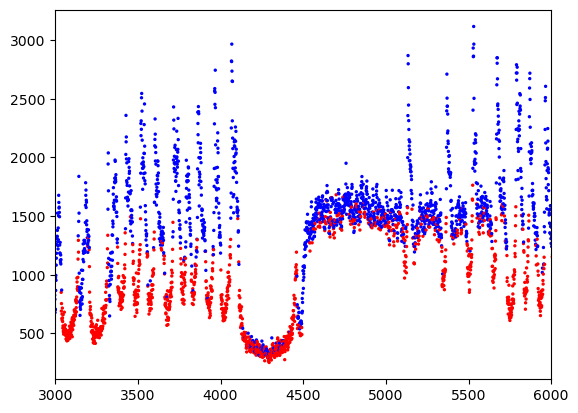

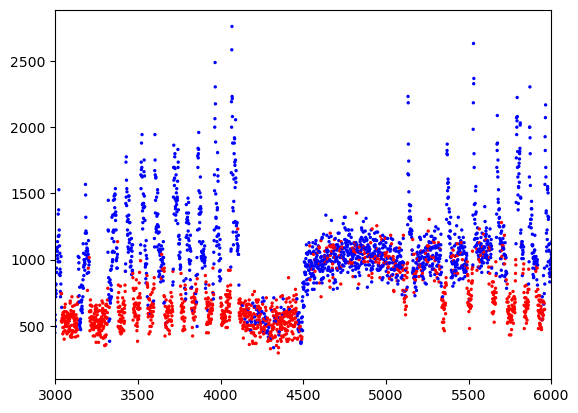

In [130]:
color=[]
list_=[]
r=0
for i in range(len(low)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)


print(r)
plt.scatter(range(len(low)),low,c=color,s=2)

#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(3000,6000)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()
#plt.clear()
plt.scatter(range(len(low)),mid,c=color,s=2)
plt.xlim(3000,6000)
plt.show()
#
plt.scatter(range(len(high)),high,c=color,s=2)
plt.xlim(3000,6000)
plt.show()

In [ ]:
color=[]
list_=[]
r=0
for i in range(len(mid)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)
        
print(r)
plt.scatter(range(len(low)),mid,c=color,s=2)
#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(0,2500)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()

In [122]:
len(low)

16959